<a href="https://colab.research.google.com/github/aash1999/8-bit-harvard-architecture-processor-VHDL/blob/master/us_accident_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import warnings

init_notebook_mode(connected=True)

warnings.filterwarnings("ignore")

%matplotlib inline

In [19]:
!tar -xzvf /content/dataset.tar.gz

._US_Accidents_Dec20.csv
US_Accidents_Dec20.csv

gzip: stdin: unexpected end of file
tar: Unexpected EOF in archive
tar: Unexpected EOF in archive
tar: Error is not recoverable: exiting now


In [20]:
data_file = r'/content/US_Accidents_Dec20.csv'
df = pd.read_csv(data_file)
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [21]:
df.drop(columns=['End_Lat', 'End_Lng' ,'Number', 'Airport_Code' ,'Weather_Timestamp' , 'TMC' , 
                 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
                 'Country','ID', 'Source','Timezone'], inplace=True)

In [15]:
data.isnull().sum() #checking for total null values

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  480070
End_Lng                  480070
Distance(mi)                  0
Description                   0
Number                   310376
Street                        0
Side                          0
City                         20
County                        0
State                         0
Zipcode                      61
Country                       0
Timezone                     61
Airport_Code                 62
Weather_Timestamp          3935
Temperature(F)             6959
Wind_Chill(F)            417881
Humidity(%)                7604
Pressure(in)               5500
Visibility(mi)            10145
Wind_Direction             3967
Wind_Speed(mph)           85473
Precipitation(in)        429621
Weather_

In [22]:
from pprint import pprint
def sanity_check(df):
    pprint('-'*70)
    pprint('No. of Row : {0[0]}        No. of Columns : {0[1]}'.format(df.shape))
    pprint('-'*70)
    data_profile = pd.DataFrame(df.dtypes.reset_index()).rename(columns = {'index' : 'Attribute' ,
                                                                           0 : 'DataType'}).set_index('Attribute')
    data_profile = pd.concat([data_profile,df.isnull().sum()], axis=1).rename(columns = {0 : 'Missing Values'})
    data_profile = pd.concat([data_profile,df.nunique()], axis=1).rename(columns = {0 : 'Unique Values'})
    pprint(data_profile)
    pprint('-'*70)

In [23]:
df.dropna(subset=['City','Sunrise_Sunset','Description'], inplace=True)

In [24]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [25]:
sanity_check(df)

'----------------------------------------------------------------------'
'No. of Row : 1058029        No. of Columns : 36'
'----------------------------------------------------------------------'
                         DataType  Missing Values  Unique Values
Attribute                                                       
Severity                    int64               0              4
Start_Time         datetime64[ns]               0        1031702
End_Time           datetime64[ns]               0        1031945
Start_Lat                 float64               0         408172
Start_Lng                 float64               0         397506
Distance(mi)              float64               0           3076
Description                object               0         748252
Street                     object               0          88392
Side                       object               0              3
City                       object               0           8770
County                  

In [26]:
top_10_state = df[['City','State' , 'Severity']].groupby('State').agg({'City' : 'count' , 
                                                       'Severity' : 'mean' }).sort_values(
    by='City',ascending=False).head(10)
    

In [27]:
df_state_city = df[['State' , 'City','Severity']].groupby(['State' , 'City']).count().rename(columns = {'Severity' : 'Count'})

top_10_city = df_state_city.sort_values(by='Count' , ascending = False).head(10)

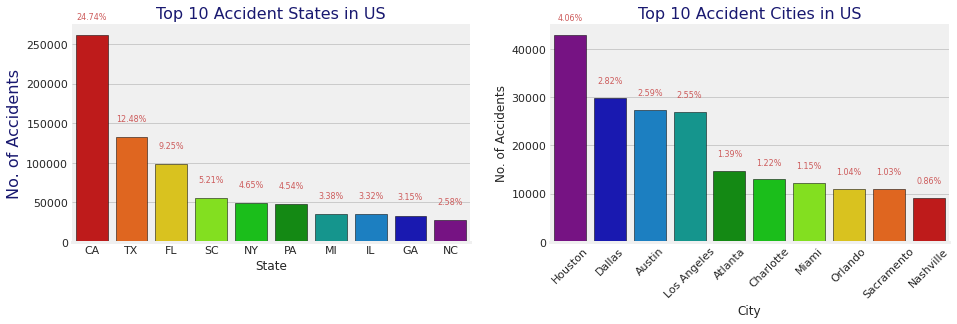

In [28]:
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(14,4))

bar = sns.barplot(x=top_10_state.index , y=top_10_state['City'],
                  palette='nipy_spectral_r' , 
#                   palette='pastel' , 
                  edgecolor = 'black',
                  ax=ax1 )
sns.despine(left = True )
ax1.set_xlabel("State")
ax1.set_ylabel("No. of Accidents" , fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
ax1.set_title('Top 10 Accident States in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
# ax3=ax1.twinx()
# ax3.plot(top_10_state['Severity'] ,'o-', color='lightgray')
# ax3.set_ylabel('Severity')


bar = sns.barplot(x=top_10_city.index.get_level_values(1) , y=top_10_city['Count'],
                  palette='nipy_spectral' , 
#                   palette='pastel' , 
                  edgecolor = 'black',
                  ax=ax2
                 )
sns.despine(left = True )
ax2.set_xlabel("City" )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Top 10 Accident Cities in US', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
plt.xticks(rotation = 45)


# Working to get labels for percentages
total_accidents = len(df)

# for state
for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')

    
# for City
for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 3000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='indianred')
    
    
fig.show()

In [29]:
# Creating Date Time series attributes


df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month  # .dt.month_name()
df['Hour'] = df['Start_Time'].dt.hour
diff = df['End_Time'] - df['Start_Time']
df['DelayTime'] = round(diff.dt.seconds/3600,1)
year = df['Year'].value_counts()
month = df['Month'].value_counts().sort_index()
month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug' 
             , 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}

hour_severity = df[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

df['Day'] = df['Start_Time'].dt.dayofweek
day_severity = df[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}


# df['Month'].head()

In [30]:
hour_severity = df[['Hour' , 'Severity']].groupby('Hour').agg({'Hour' : 'count' , 'Severity' : 'mean'})

df['Day'] = df['Start_Time'].dt.dayofweek
day_severity = df[['Day' , 'Severity']].groupby('Day').agg({'Day' : 'count' , 'Severity' : 'mean'})
day_map = {0:'Monday' , 1:'Tueday' , 2:'Wedday' , 3:"Thuday" , 4:'Friday' , 5:"Saturday" , 6:'Sunday'}

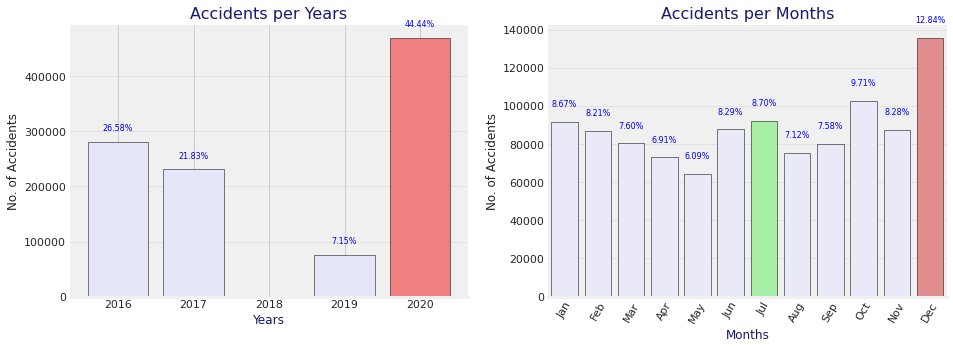

In [31]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,5))


# plot for year

light_palette = sns.color_palette(palette='pastel')

year_color_map = ['Lavender' for _ in range(5)]
year_color_map[0] = 'LightCoral' #light_palette[0]
year_color_map[4] = 'PaleGreen' #light_palette[2]

years = ax1.bar(year.index.values , year, color=year_color_map , edgecolor = 'black')
ax1.spines[('top')].set_visible(False)
ax1.spines[('right')].set_visible(False)
ax1.set_xlabel("Years", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax1.set_ylabel("No. of Accidents")
ax1.set_title('Accidents per Years', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

for p in ax1.patches :
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2,
            height + 20000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='Blue')

    
# plot for month


month_color_map = ['Lavender' for _ in range(12)]
month_color_map[11] = 'LightCoral' #light_palette[0]
month_color_map[6] = 'PaleGreen' #light_palette[2]

m = sns.barplot( x= month.index.map(month_map), y=month,  ax = ax2, palette=month_color_map , edgecolor='black' )
plt.xticks(rotation=60)
ax2.set_xlabel("Months", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents per Months', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
sns.despine(left=True)

for p in ax2.patches :
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2,
            height + 8000,
            '{:.2f}%'.format(height/total_accidents*100),
            ha = "center",
            fontsize = 8, color='blue')

ax1.grid(axis='y', linestyle='-', alpha=0.4)    
ax2.grid(axis='y', linestyle='-', alpha=0.4) 
    
plt.show()

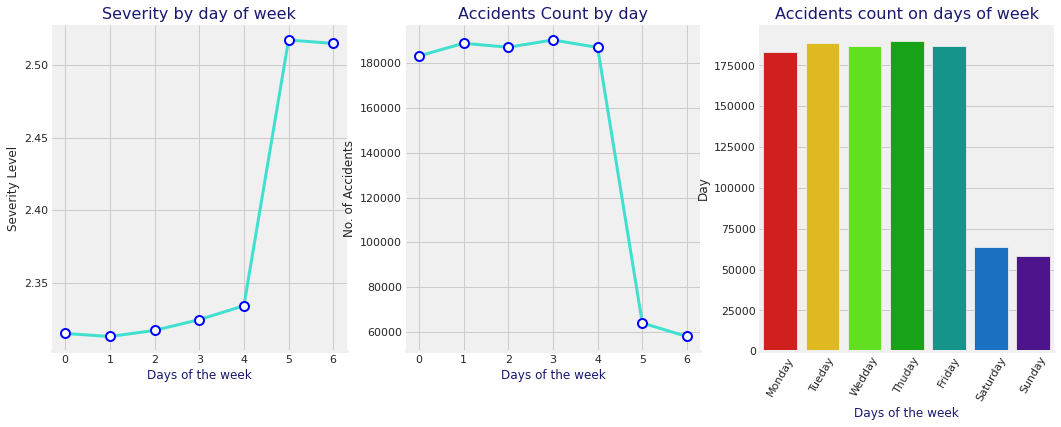

In [32]:
fig, (ax , ax2, ax3) = plt.subplots(1,3,figsize = (16,6))

sns.set_context('paper')

# f = sns.lineplot(x=day_severity['Day'].index.map(day_map) , y=day_severity['Severity'], 
#                  ax = ax,  label='Severity', legend = 'full' , dashes=True, palette=light_palette, color='red')


ax.plot(day_severity['Severity'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')


ax.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("Severity Level")
ax.set_title('Severity by day of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})


ax2.plot(day_severity['Day'] ,  color='Turquoise', label=day_map,linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

ax2.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("No. of Accidents")
ax2.set_title('Accidents Count by day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

f2 = sns.barplot(x=day_severity['Day'].index.map(day_map) , y=day_severity['Day'], ax = ax3, palette = 'nipy_spectral_r')
plt.xticks(rotation=60)
ax3.set_xlabel("Days of the week", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax3.set_title('Accidents count on days of week', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})

sns.despine(left=True)

fig.show()

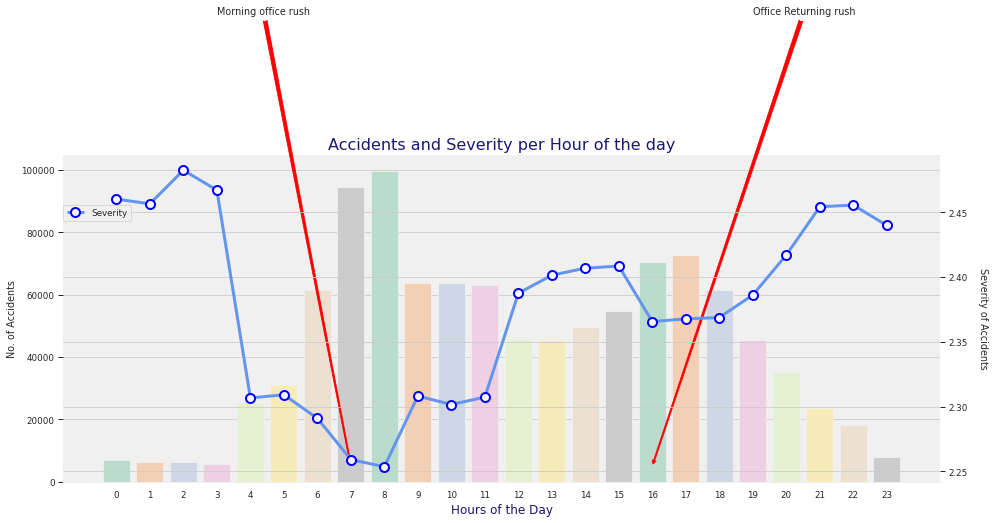

In [33]:
fig, ax = plt.subplots(1,1,figsize = (14,6))

sns.set_context('paper')

# ax.plot(hour_severity['Hour'], color='Salmon' , linewidth=3, linestyle='solid',
#         marker='*',markersize=18, markerfacecolor='w',markeredgecolor='m',markeredgewidth='2',
#         label = 'No. of Accidents'
#        )


f = sns.barplot(x=hour_severity['Hour'].index , y=hour_severity['Hour'], ax = ax, palette='Pastel2')

ax2 = ax.twinx()

ax2.plot(hour_severity['Severity'] , color='CornFlowerBlue', label='Severity',linewidth=3,
           linestyle='solid',marker='.',markersize=18, markerfacecolor='w',markeredgecolor='b',markeredgewidth='2')

sns.despine(left=True)
# ax.spines[('top')].set_visible(False)
# ax.spines[('right')].set_visible(False)
# ax.spines[('left')].set_visible(False)
ax2.spines[('top')].set_visible(False)
ax2.spines[('right')].set_visible(False)
ax2.spines[('left')].set_visible(False)
ax.set_xlabel("Hours of the Day", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("No. of Accidents")
ax2.set_ylabel("Severity of Accidents", rotation=270 ,labelpad=20)
ax.set_title('Accidents and Severity per Hour of the day', fontdict = {'fontsize':16 , 'color':'MidnightBlue'})
# ax.legend(loc=(0,1))
ax2.legend(loc=(0,0.8))

ax.annotate('Morning office rush' , xytext=(3,150000) , xy=(7,5000),arrowprops={'arrowstyle':'fancy' , 'color':'Red'})
ax.annotate('Office Returning rush' , xytext=(19,150000),xy=(16,5000),arrowprops={'arrowstyle':'fancy', 'color':'Red'})

fig.show()

In [34]:
sev_4_mean = df[df['Severity'] == 4][['Severity','Year']].groupby('Year').count().mean()
sev_4_mean[0]

1344.5

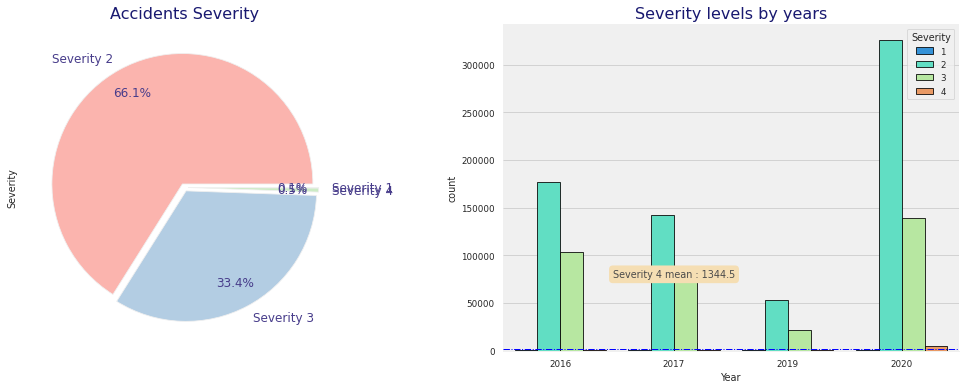

In [35]:
f , (ax1,ax2) = plt.subplots(1,2,figsize=(16,6))

df['Severity'].value_counts().plot.pie(autopct = '%1.1f%%' , ax=ax1, colors =sns.color_palette(palette='Pastel1') ,
                                      pctdistance = 0.8, explode = [.03,.03,.03,.03], 
                                       textprops = {'fontsize' : 12 , 'color' : 'DarkSlateBlue'},
                                       labels=['Severity 2','Severity 3' , 'Severity 4' , 'Severity 1']
                              )

ax1.set_title("Accidents Severity", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )


s = sns.countplot(data=df[['Severity','Year']] , x = 'Year' , hue='Severity' , ax=ax2, palette = 'rainbow' 
                  , edgecolor='black')
ax2.axhline(sev_4_mean[0] ,color='Blue', linewidth=1, linestyle='dashdot')
ax2.annotate(f"Severity 4 mean : {sev_4_mean[0]}",
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='Wheat', linewidth=0),
            xy=(1,80000))

ax2.set_title("Severity levels by years", fontdict = {'fontsize':16 , 'color':'MidnightBlue'} )

sns.despine(left=True)

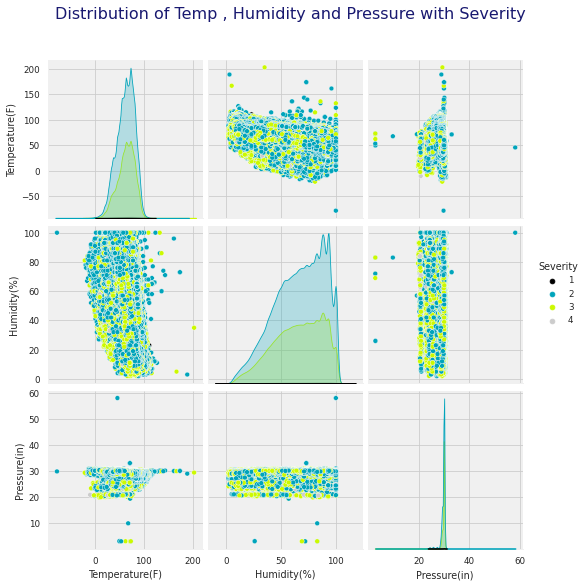

In [36]:
pair = sns.pairplot(df[['Severity','Temperature(F)','Humidity(%)','Pressure(in)']].dropna(), hue='Severity', palette='nipy_spectral')
# pair = sns.pairplot(df[['Severity','Temperature(F)']].dropna(), hue='Severity', palette='nipy_spectral')

pair.fig.suptitle('Distribution of Temp , Humidity and Pressure with Severity', y =1.08 
                  , fontsize = 16 , color = 'MidnightBlue' , ha = 'center' , va='top')

plt.show()

In [37]:
# Generalization of Weather condition

conditions = df['Weather_Condition'].dropna().unique().tolist()

condition_map = dict()


for x in conditions :
    if x.lower().find('snow')>0 or x.lower().startswith('snow') or x.lower().find('ice')>0 or x.lower().startswith('ice'):
        condition_map[x] = 'Snow Situation'
    elif (x.lower().find('rain')>0 or x.lower().find('drizzle')>0 or 
          x.lower().startswith('rain') or x.lower().startswith('drizzle') or
          x.lower().find('thunder')>0 or x.lower().startswith('thunder')):
        condition_map[x] = 'Rainy Situation'
    elif (x.lower().find('storm')>0 or x.lower().find('thunder')>0):
        condition_map[x] = 'Storm Situation'
    elif (x.lower().find('cloud')>0 or x.lower().startswith('cloud')>0):
        condition_map[x] = 'Cloudy'
    elif (x.lower().find('fog')>0 or x.lower().startswith('fog')>0):
        condition_map[x] = 'Fog'
    elif (x.lower().find('dust')>0 or x.lower().startswith('dust')>0):
        condition_map[x] = 'Dust'
    elif (x.lower().find('wind')>0 or x.lower().startswith('wind')>0):
        condition_map[x] = 'Windy'
    else:
        condition_map[x] =x


df['Weather'] = df['Weather_Condition'].map(condition_map)
# df['Weather'].value_counts().sort_values(ascending=False).head(20)
total = len(df['Weather'])
# total
top_10_weather = df['Weather'].value_counts()[:10]
top_15_weather = df['Weather'].value_counts()[:13]

top_10_weather
# condition_map

Cloudy             383044
Fair               234317
Clear              208889
Rainy Situation     82946
Overcast            80264
Fog                 14098
Snow Situation      13672
Haze                10159
Storm Situation      2937
Windy                2766
Name: Weather, dtype: int64

In [38]:
def check_exist(x):
    if x in top_15_weather :
        return x
    else :
        return 'Other'

df['Weather2'] = df['Weather'].apply(check_exist)

cmap = {x:y for (x,y) in zip(top_10_weather.index , sns.color_palette('pastel'))}

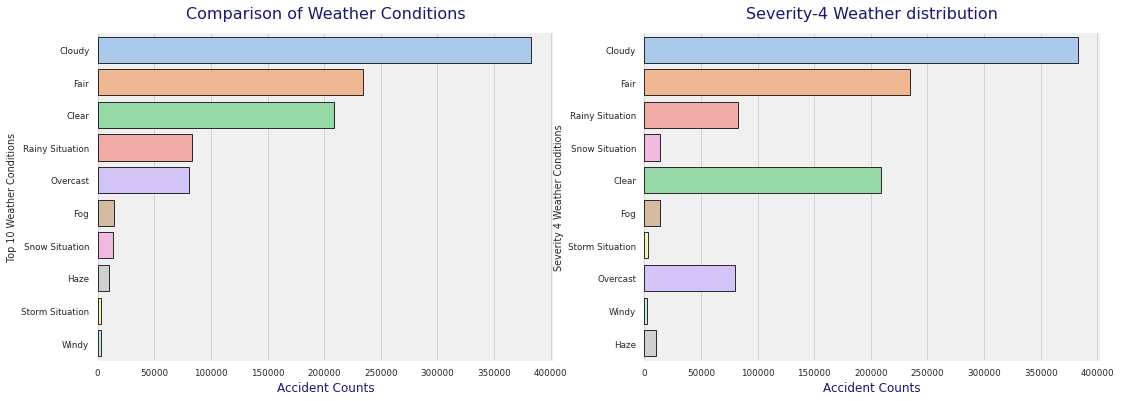

In [39]:
# Analysing the 'Weather_Condition' attribute

fig,(ax,ax2) = plt.subplots(1,2,figsize = (16, 6))

sns.countplot(y='Weather', data=df[['Weather','Severity']], order=df['Weather'].value_counts()[:10].index, 
              palette=cmap , edgecolor = 'black' , 
              ax= ax)


ax.set_xlabel("Accident Counts", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax.set_ylabel("Top 10 Weather Conditions")
ax.set_title('Comparison of Weather Conditions', fontdict = {'fontsize':16 , 'color':'MidnightBlue'}, pad=15)


sns.countplot(y='Weather', data=df, order=df[df['Severity'] == 4]['Weather'].value_counts()[:10].index, 
              palette=cmap, edgecolor = 'black' ,  ax= ax2)

ax2.set_xlabel("Accident Counts", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
ax2.set_ylabel("Severity 4 Weather Conditions")
ax2.set_title('Severity-4 Weather distribution', fontdict = {'fontsize':16 , 'color':'MidnightBlue'}, pad=15)


# ax.grid(axis='y', linestyle='-', alpha=0.4) 
sns.despine(left=True)

plt.show()

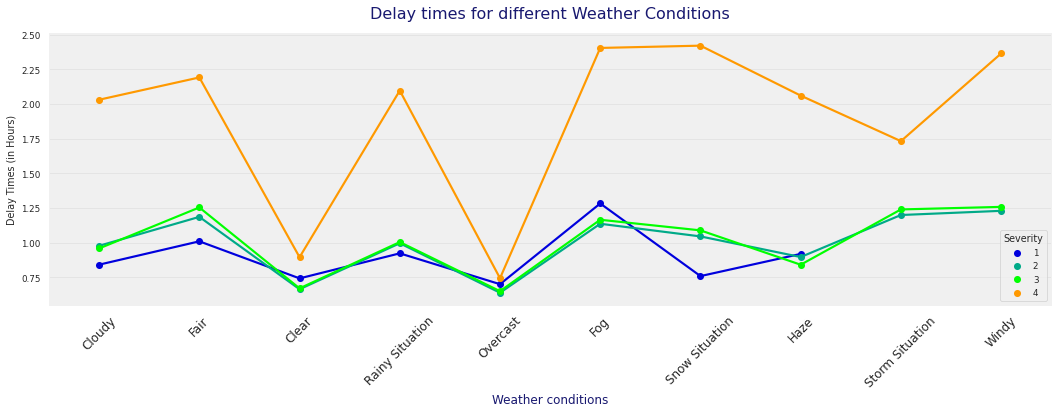

In [40]:
fig, ax = plt.subplots(1,1,figsize=(16,5))

w = sns.pointplot(y='DelayTime',x='Weather2',data=df[['Weather2','DelayTime','Severity']],
                  hue = 'Severity'
                  ,ci=None  , 
               order= top_10_weather.index, #kind = 'point',
               height=4, aspect=2 , palette='nipy_spectral', ax= ax)

ax.grid(axis='y', linestyle='-', alpha=0.4)  

# w = sns.lineplot(x='Weather2', y='DelayTime' , data=df[['Weather2','DelayTime']] , hue_order= top_15_weather.index)

plt.xlabel("Weather conditions", fontdict = {'fontsize':12 , 'color':'MidnightBlue'} )
plt.xticks(fontsize=12 , rotation = 45)
plt.ylabel("Delay Times (in Hours)")

ax.set_title('Delay times for different Weather Conditions', fontdict = {'fontsize':16 , 'color':'MidnightBlue'}, pad=15)

plt.show()

In [41]:
df['Severity'] = df['Severity'].astype('int')

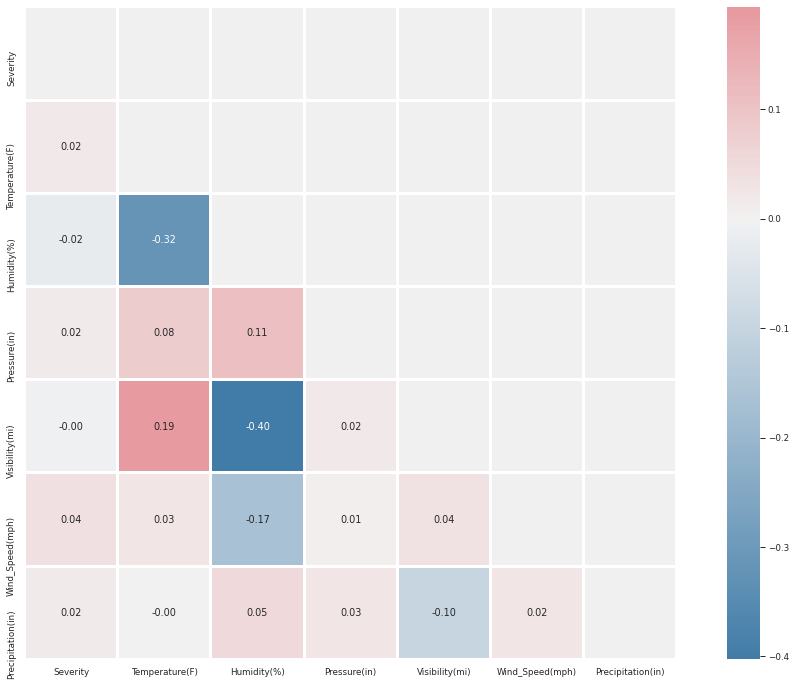

In [42]:
# plotting correlations on a heatmap

features = ['Severity','Temperature(F)', 'Humidity(%)', 
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 
       'Sunrise_Sunset']

mask = np.zeros_like(df[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# [df['Severity'] == 4]

plt.figure(figsize=(16,12))
sns.heatmap(df[features].corr(), cmap=sns.diverging_palette(240, 10, as_cmap=True), square=True, 
            annot=True, fmt='.2f', center=0, linewidth=2, cbar=True , mask = mask)


plt.show()

In [52]:
df = pd.read_csv('/content/US_Accidents_Dec20.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [53]:
df.drop(['Wind_Chill(F)', 'End_Lat', 'End_Lng'], axis = 1, inplace = True)

In [54]:
df.drop(['Number', 'ID'], axis = 1, inplace = True)

In [55]:
df.dropna(subset = ['TMC'], inplace = True)

In [56]:
values = {'Temperature(F)': df['Temperature(F)'].mean(), 'Humidity(%)': df['Humidity(%)'].mean(), 'Pressure(in)': df['Pressure(in)'].mean(), 'Visibility(mi)': df['Visibility(mi)'].mean(), 'Wind_Speed(mph)' : df['Wind_Speed(mph)'].mean(), 'Precipitation(in)': df['Precipitation(in)'].mean() }
df.fillna(value = values, inplace = True)
df.isnull().sum()

Source                       0
TMC                          0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    1
Start_Lng                    1
Distance(mi)                 1
Description                  2
Street                       1
Side                         1
City                        36
County                       1
State                        1
Zipcode                    174
Country                      1
Timezone                   653
Airport_Code              1314
Weather_Timestamp        11649
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           16109
Wind_Speed(mph)              0
Precipitation(in)            0
Weather_Condition        20061
Amenity                      1
Bump                         1
Crossing                     1
Give_Way                     1
Junction                     1
No_Exit 

In [57]:
df.dropna(inplace = True)
df.isnull().sum()

Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034747 entries, 0 to 1058065
Data columns (total 44 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Source                 1034747 non-null  object 
 1   TMC                    1034747 non-null  float64
 2   Severity               1034747 non-null  int64  
 3   Start_Time             1034747 non-null  object 
 4   End_Time               1034747 non-null  object 
 5   Start_Lat              1034747 non-null  float64
 6   Start_Lng              1034747 non-null  float64
 7   Distance(mi)           1034747 non-null  float64
 8   Description            1034747 non-null  object 
 9   Street                 1034747 non-null  object 
 10  Side                   1034747 non-null  object 
 11  City                   1034747 non-null  object 
 12  County                 1034747 non-null  object 
 13  State                  1034747 non-null  object 
 14  Zipcode           

In [59]:
df.drop(['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis = 1, inplace = True)

In [60]:
df['Source'].value_counts()

MapQuest         1002080
MapQuest-Bing      32667
Name: Source, dtype: int64

In [61]:
source = pd.get_dummies(df['Source'])
df = pd.concat([df.drop('Source', axis = 1), source], axis = 1)

In [62]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors = 'coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors = 'coerce')

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour

df['Duration'] = round((df['End_Time']- df['Start_Time'])/np.timedelta64(1,'m'))

In [63]:
neg_outliers=df['Duration']<=0

df[neg_outliers] = np.nan

df.dropna(subset=['Duration'],axis=0,inplace=True)

In [64]:
df.drop(['Start_Time', 'End_Time'], axis = 1, inplace = True)

In [65]:
df['Country'].value_counts()

US    1034747
Name: Country, dtype: int64

In [66]:
df.drop(['Country', 'County', 'City'], axis = 1, inplace = True)

In [67]:
df.drop(['Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp'], axis = 1, inplace = True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034747 entries, 0 to 1058065
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TMC                1034747 non-null  float64
 1   Severity           1034747 non-null  float64
 2   Start_Lat          1034747 non-null  float64
 3   Start_Lng          1034747 non-null  float64
 4   Distance(mi)       1034747 non-null  float64
 5   Description        1034747 non-null  object 
 6   Street             1034747 non-null  object 
 7   Side               1034747 non-null  object 
 8   State              1034747 non-null  object 
 9   Temperature(F)     1034747 non-null  float64
 10  Humidity(%)        1034747 non-null  float64
 11  Pressure(in)       1034747 non-null  float64
 12  Visibility(mi)     1034747 non-null  float64
 13  Wind_Direction     1034747 non-null  object 
 14  Wind_Speed(mph)    1034747 non-null  float64
 15  Precipitation(in)  1034747 non-n

In [69]:
def location(street):
    if 'I-' in street:
        return 1
    else:
        return 0

df['highway'] = df['Street'].apply(location)
df.drop('Street', axis = 1, inplace = True)

In [70]:
df['highway'].head()

0    1
1    0
2    0
3    1
4    0
Name: highway, dtype: int64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034747 entries, 0 to 1058065
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TMC                1034747 non-null  float64
 1   Severity           1034747 non-null  float64
 2   Start_Lat          1034747 non-null  float64
 3   Start_Lng          1034747 non-null  float64
 4   Distance(mi)       1034747 non-null  float64
 5   Description        1034747 non-null  object 
 6   Side               1034747 non-null  object 
 7   State              1034747 non-null  object 
 8   Temperature(F)     1034747 non-null  float64
 9   Humidity(%)        1034747 non-null  float64
 10  Pressure(in)       1034747 non-null  float64
 11  Visibility(mi)     1034747 non-null  float64
 12  Wind_Direction     1034747 non-null  object 
 13  Wind_Speed(mph)    1034747 non-null  float64
 14  Precipitation(in)  1034747 non-null  float64
 15  Weather_Condition  1034747 non-n

In [72]:
df.drop(['State', 'Description'], axis = 1, inplace = True)

In [73]:
value = df[(df['Side'] != 'R') & (df['Side'] != 'L')].index
df.drop(value, inplace = True)
df['Side'].value_counts()

R    837427
L    197319
Name: Side, dtype: int64

In [74]:
sides = pd.get_dummies(df['Side'], drop_first = True)
sides = sides.rename({'R' : 'Side'}, axis = 1)
df = pd.concat([df.drop('Side', axis = 1), sides], axis = 1)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034746 entries, 0 to 1058065
Data columns (total 36 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TMC                1034746 non-null  float64
 1   Severity           1034746 non-null  float64
 2   Start_Lat          1034746 non-null  float64
 3   Start_Lng          1034746 non-null  float64
 4   Distance(mi)       1034746 non-null  float64
 5   Temperature(F)     1034746 non-null  float64
 6   Humidity(%)        1034746 non-null  float64
 7   Pressure(in)       1034746 non-null  float64
 8   Visibility(mi)     1034746 non-null  float64
 9   Wind_Direction     1034746 non-null  object 
 10  Wind_Speed(mph)    1034746 non-null  float64
 11  Precipitation(in)  1034746 non-null  float64
 12  Weather_Condition  1034746 non-null  object 
 13  Amenity            1034746 non-null  object 
 14  Bump               1034746 non-null  object 
 15  Crossing           1034746 non-n

In [76]:
df['Wind_Direction'].value_counts()

CALM        97714
Calm        80169
SSW         54303
WNW         53125
SSE         50809
SW          50637
WSW         48869
NW          48191
West        44849
S           43364
NNW         42400
South       41202
SE          40851
ESE         35895
NNE         35635
NE          35602
W           34821
N           34802
ENE         34534
Variable    28178
E           27491
North       26395
East        22609
VAR         22301
Name: Wind_Direction, dtype: int64

In [77]:
df['Wind_Direction'] = df['Wind_Direction'].apply(lambda dire: dire[0])
df['Wind_Direction'].value_counts()

S    281166
N    223025
W    181664
C    177883
E    120529
V     50479
Name: Wind_Direction, dtype: int64

In [78]:
wind = pd.get_dummies(df['Wind_Direction'], drop_first = True)
df = pd.concat([df.drop('Wind_Direction', axis = 1), wind], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034746 entries, 0 to 1058065
Data columns (total 40 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TMC                1034746 non-null  float64
 1   Severity           1034746 non-null  float64
 2   Start_Lat          1034746 non-null  float64
 3   Start_Lng          1034746 non-null  float64
 4   Distance(mi)       1034746 non-null  float64
 5   Temperature(F)     1034746 non-null  float64
 6   Humidity(%)        1034746 non-null  float64
 7   Pressure(in)       1034746 non-null  float64
 8   Visibility(mi)     1034746 non-null  float64
 9   Wind_Speed(mph)    1034746 non-null  float64
 10  Precipitation(in)  1034746 non-null  float64
 11  Weather_Condition  1034746 non-null  object 
 12  Amenity            1034746 non-null  object 
 13  Bump               1034746 non-null  object 
 14  Crossing           1034746 non-null  object 
 15  Give_Way           1034746 non-n

In [79]:
df['Weather_Condition'].value_counts().head(30)

Fair                            232506
Clear                           208886
Mostly Cloudy                   139320
Cloudy                           95514
Partly Cloudy                    95188
Overcast                         80263
Light Rain                       52794
Scattered Clouds                 47593
Fog                              12811
Rain                             12160
Light Snow                       11374
Haze                             10131
Heavy Rain                        4743
Light Drizzle                     3577
Smoke                             2721
Fair / Windy                      2673
Cloudy / Windy                    1774
T-Storm                           1769
Mostly Cloudy / Windy             1603
Thunder in the Vicinity           1295
Light Rain with Thunder           1268
Snow                              1204
Light Thunderstorms and Rain      1083
Wintry Mix                        1068
Thunder                           1050
Light Rain / Windy       

In [80]:
def weather(kind):
    if 'Rain' in kind or 'Snow' in kind or 'Storm' in kind or 'Thunder' in kind or 'Drizzle' in kind:
        return 'Slippery'
    elif 'Fog' in kind or 'Smoke' in kind or 'Haze' in kind or 'Mist'in kind:
        return 'Vis_obstruct'
    else:
        return 'Fair'
    
weather = df['Weather_Condition'].apply(weather)
weather.value_counts()

Fair            907890
Slippery         99230
Vis_obstruct     27626
Name: Weather_Condition, dtype: int64

In [81]:
weather_type = pd.get_dummies(weather, drop_first = True)
weather_type.head()

,Slippery,Vis_obstruct
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [82]:
df = pd.concat([df.drop('Weather_Condition', axis = 1) , weather_type], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034746 entries, 0 to 1058065
Data columns (total 41 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TMC                1034746 non-null  float64
 1   Severity           1034746 non-null  float64
 2   Start_Lat          1034746 non-null  float64
 3   Start_Lng          1034746 non-null  float64
 4   Distance(mi)       1034746 non-null  float64
 5   Temperature(F)     1034746 non-null  float64
 6   Humidity(%)        1034746 non-null  float64
 7   Pressure(in)       1034746 non-null  float64
 8   Visibility(mi)     1034746 non-null  float64
 9   Wind_Speed(mph)    1034746 non-null  float64
 10  Precipitation(in)  1034746 non-null  float64
 11  Amenity            1034746 non-null  object 
 12  Bump               1034746 non-null  object 
 13  Crossing           1034746 non-null  object 
 14  Give_Way           1034746 non-null  object 
 15  Junction           1034746 non-n

In [83]:
df['Sunrise_Sunset'].value_counts()

Day      742626
Night    292120
Name: Sunrise_Sunset, dtype: int64

In [84]:
sky = pd.get_dummies(df['Sunrise_Sunset'], drop_first = True)
sky.head()

,Night
0,1
1,1
2,1
3,1
4,0


In [85]:
df = pd.concat([df.drop('Sunrise_Sunset', axis = 1), sky], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034746 entries, 0 to 1058065
Data columns (total 41 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TMC                1034746 non-null  float64
 1   Severity           1034746 non-null  float64
 2   Start_Lat          1034746 non-null  float64
 3   Start_Lng          1034746 non-null  float64
 4   Distance(mi)       1034746 non-null  float64
 5   Temperature(F)     1034746 non-null  float64
 6   Humidity(%)        1034746 non-null  float64
 7   Pressure(in)       1034746 non-null  float64
 8   Visibility(mi)     1034746 non-null  float64
 9   Wind_Speed(mph)    1034746 non-null  float64
 10  Precipitation(in)  1034746 non-null  float64
 11  Amenity            1034746 non-null  object 
 12  Bump               1034746 non-null  object 
 13  Crossing           1034746 non-null  object 
 14  Give_Way           1034746 non-null  object 
 15  Junction           1034746 non-n

In [86]:
df['Turning_Loop'].value_counts()

False    1034746
Name: Turning_Loop, dtype: int64

In [87]:
df.drop(['Turning_Loop', 'Slippery', 'MapQuest-Bing'], axis = 1, inplace = True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034746 entries, 0 to 1058065
Data columns (total 38 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   TMC                1034746 non-null  float64
 1   Severity           1034746 non-null  float64
 2   Start_Lat          1034746 non-null  float64
 3   Start_Lng          1034746 non-null  float64
 4   Distance(mi)       1034746 non-null  float64
 5   Temperature(F)     1034746 non-null  float64
 6   Humidity(%)        1034746 non-null  float64
 7   Pressure(in)       1034746 non-null  float64
 8   Visibility(mi)     1034746 non-null  float64
 9   Wind_Speed(mph)    1034746 non-null  float64
 10  Precipitation(in)  1034746 non-null  float64
 11  Amenity            1034746 non-null  object 
 12  Bump               1034746 non-null  object 
 13  Crossing           1034746 non-null  object 
 14  Give_Way           1034746 non-null  object 
 15  Junction           1034746 non-n

In [89]:
from sklearn.model_selection import train_test_split
X = df.drop('Severity', axis = 1)
y_rfc = df['Severity']
y_nn = df['Severity']

In [90]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X,y_rfc, test_size = 0.3, random_state = 101)

In [91]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train_r, y_train_r)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
y_rfc_pred = rfc.predict(X_test_r)

In [93]:
print(confusion_matrix(y_test_r, y_rfc_pred))
print('\n')
print(classification_report(y_test_r, y_rfc_pred))

[[     0    141     14      0]
 [     2 190994  14738     12]
 [     0  25967  76941     80]
 [     0    215   1115    205]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       155
         2.0       0.88      0.93      0.90    205746
         3.0       0.83      0.75      0.79    102988
         4.0       0.69      0.13      0.22      1535

    accuracy                           0.86    310424
   macro avg       0.60      0.45      0.48    310424
weighted avg       0.86      0.86      0.86    310424



In [94]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [95]:
encoder = LabelEncoder()
encoder.fit(y_nn)
y_nn = encoder.transform(y_nn)
y_nn = to_categorical(y_nn)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y_nn, test_size = 0.3, random_state = 101)

In [97]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [99]:
model = Sequential()

model.add(Dense(39, activation = 'relu', input_dim = len(df.columns) - 1))
model.add(Dropout(rate = 0.4))

model.add(Dense(20 , activation = 'relu'))
model.add(Dropout(rate = 0.4))

model.add(Dense(10 , activation = 'relu'))
model.add(Dropout(rate = 0.4))

model.add(Dense(4, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [100]:
model.fit(X_train, y_train, epochs = 30, callbacks = [early_stop],batch_size = 256, validation_data = (X_test, y_test))

Epoch 1/30
2830/2830 [==============================] - 8s 3ms/step - loss: 0.6626 - accuracy: 0.7065 - val_loss: 0.4696 - val_accuracy: 0.7933
Epoch 2/30
2830/2830 [==============================] - 7s 2ms/step - loss: 0.5076 - accuracy: 0.7787 - val_loss: 0.4655 - val_accuracy: 0.7957
Epoch 3/30
2830/2830 [==============================] - 7s 2ms/step - loss: 0.4982 - accuracy: 0.7815 - val_loss: 0.4615 - val_accuracy: 0.7987
Epoch 4/30
2830/2830 [==============================] - 7s 2ms/step - loss: 0.4921 - accuracy: 0.7829 - val_loss: 0.4579 - val_accuracy: 0.7990
Epoch 5/30
2830/2830 [==============================] - 7s 2ms/step - loss: 0.4884 - accuracy: 0.7860 - val_loss: 0.4574 - val_accuracy: 0.7994
Epoch 6/30
2830/2830 [==============================] - 7s 2ms/step - loss: 0.4880 - accuracy: 0.7852 - val_loss: 0.4572 - val_accuracy: 0.7997
Epoch 7/30
2830/2830 [==============================] - 7s 2ms/step - loss: 0.4867 - accuracy: 0.7841 - val_loss: 0.4550 - val_accuracy:

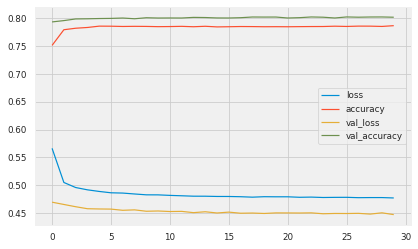

In [101]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [102]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9701/9701 [==============================] - 10s 1ms/step - loss: 0.4473 - accuracy: 0.8018

accuracy: 80.18%
